In [2]:
import numpy as np
import pandas as pd
np.random.seed(2)

In [3]:
df = pd.Series(np.random.random_integers(0,100,5),name='marks')

E:\sypder\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  """Entry point for launching an IPython kernel.


In [4]:
df1=pd.Series([i for i in range(len(df))],name='id')
data=pd.concat([df1,df],axis=1)
data # data Set

,id,marks
0,0,40
1,1,15
2,2,72
3,3,22
4,4,43


In [5]:
df = data.copy()
pts = df.values

In [15]:
class agglo(object):
    def __init__(self):
        pass
    
    def distance_matrix(self,samples):
        '''Used to compute Distance Matrix'''
        Distance_mat = np.zeros((len(samples),len(samples))) # create array_matrix with zeros
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = (self.Euclidean_distance(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 999 #diag to 0 --> 999
        return Distance_mat
    
    
    def Euclidean_distance(self,sample1,sample2):
        '''Calculate Euclidean_distance'''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j]))) #np.linalg.norm = abs(sqrt((a-b)**2))
                except:
                    dist.append(self.mergesample(sample1[i],sample2[j])) #if no value to compute go merge
       
        return min(dist)
    
    def mergesample(self,s1,s2):
        '''To be used in case we have one sample and one cluster ,to compute the distances between elements of a cluster(which are
            samples) and the actual sample given '''
        if str(type(s2[0]))!='<class \'list\'>': 
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.cluster(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.cluster(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        
        return min(dist)
    
    def cluster(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j]))) 
        return min(dist)

In [16]:
def main():
  
    progression = [[i] for i in range(pts.shape[0])]
    samples     = [[list(pts[i])] for i in range(pts.shape[0])]
    m = len(samples)
    agg = agglo()

    while m>1:
        try:
            print('Sample size before clustering    :- ',m)
            Distance_mat      = agg.distance_matrix(samples)# compute Distance Matrix
            sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0] #get minimum value index
            value_to_add      = samples.pop(sample_ind_needed[1])#pop the value o the index which is min
            samples[sample_ind_needed[0]].append(value_to_add)# new value is updated in sample

            progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]]) # updated value in Progression
            progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]# index update in Progression
            v = progression.pop(sample_ind_needed[1]) #pop the value in progression
            m = len(samples)

            print('Progression(Current Sample)      :-',progression)
            print('Cluster attained                 :-',progression[sample_ind_needed[0]])
            print('Sample size after clustering     :-',m)
            print('\n')
        except:
            m-=1
            pass

if __name__=='__main__':
    main()

Sample size before clustering    :-  5
Progression(Current Sample)      :- [[[0, [4]]], [1], [2], [3]]
Cluster attained                 :- [[0, [4]]]
Sample size after clustering     :- 4


Sample size before clustering    :-  4
Progression(Current Sample)      :- [[[0, [4]]], [[1, [3]]], [2]]
Cluster attained                 :- [[1, [3]]]
Sample size after clustering     :- 3


Sample size before clustering    :-  3
Progression(Current Sample)      :- [[[[0, [4]], [[1, [3]]]]], [2]]
Cluster attained                 :- [[[0, [4]], [[1, [3]]]]]
Sample size after clustering     :- 2


Sample size before clustering    :-  2
Progression(Current Sample)      :- [[[[[0, [4]], [[1, [3]]]], [2]]]]
Cluster attained                 :- [[[[0, [4]], [[1, [3]]]], [2]]]
Sample size after clustering     :- 1




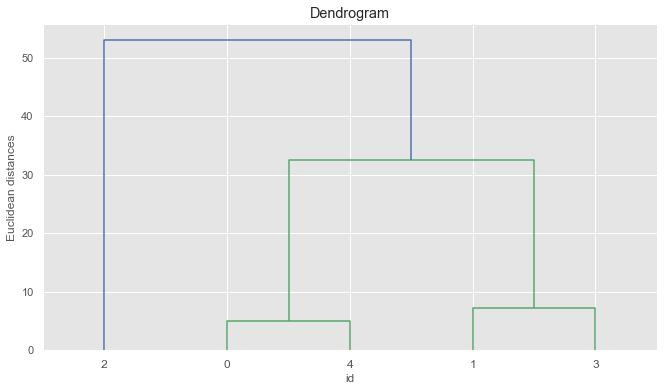

In [17]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('id')
plt.ylabel('Euclidean distances')
plt.show()

<IPython.core.display.Javascript object>


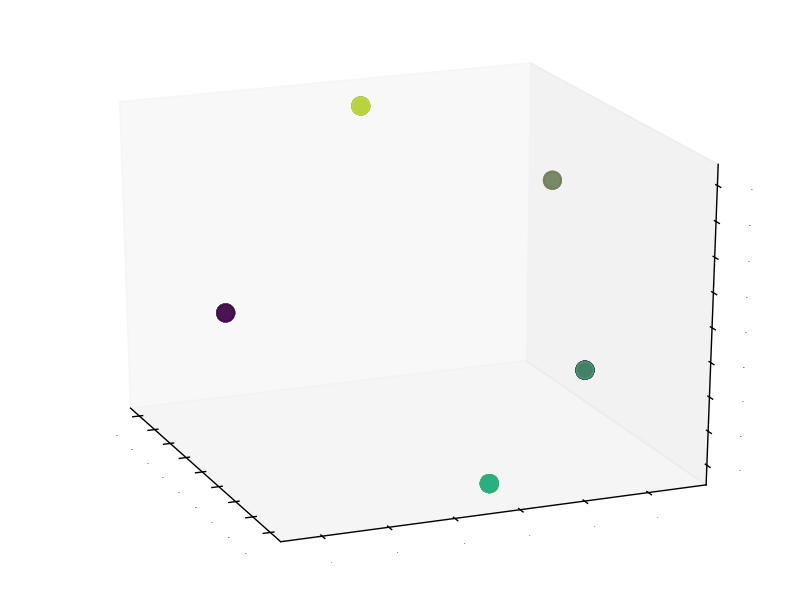

In [6]:
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
x_vals = df['id']
y_vals = df['marks']
z_vals = list(range(len(df)))


def init():
    ax.scatter(x_vals,y_vals,z_vals,cmap='viridis',s=100,c=np.random.randint(911154,high=984666,size=len(df)),marker='o',zorder=2)
    ax.grid(False)
    ax.tick_params(top='off',bottom='off',right='off',left='off',labelsize=0.0)
    for i in plt.gca().spines.values():
        i.set_visible(False)
    return fig,

def animate(i):
    ax.view_init(elev=i, azim=i)
    return fig,


anim = animation.FuncAnimation(fig, animate, init_func=init,frames=480, interval=10)

Traceback (most recent call last):
  File "E:\sypder\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "E:\sypder\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
E:\sypder\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\sypder\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

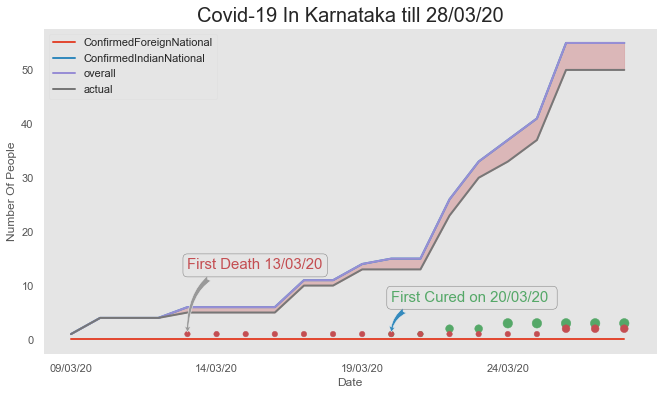

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})
#df.set_inde("Date")
df = pd.read_csv("https://raw.githubusercontent.com/dhanushnayak/LinearRegression/master/dataset/covid_19_india.csv")
df=df.rename(columns={"State/UnionTerritory":"State"})
plt.style.use("ggplot")

y1=df[df.State=='Karnataka']
from pandas import Grouper as grp
y1['date']=pd.DatetimeIndex(y1['Date'])
first_cured =y1.where(y1.Cured==1).dropna()['Date'].values[0]
first_death = y1.where(y1.Deaths==1).dropna()['Date'].values[0]
y1['overall'] = y1['ConfirmedIndianNational']+y1['ConfirmedForeignNational']

y1['actual']=y1['overall']-y1['Cured']-y1['Deaths']
box = dict(boxstyle='round',fc='none',ec='gray')
y1.plot.line('Date',['ConfirmedForeignNational','ConfirmedIndianNational','overall','actual'],linestyle='-',linewidth=2)
plt.gca().fill_between(y1['Date'],y1['actual'],y1['overall'],color='r',alpha=0.3)
#plt.gca().xaxis.set_major_locator(mpl.dates.DateLocator())
plt.gca().legend(loc=2,frameon='off',framealpha=0.3)
plt.scatter(x=y1['Date'],y=y1['Cured'],color='g',s=y1['Cured']*30)
plt.gca().annotate("First Cured on {} ".format(first_cured),xy=(first_cured,1),fontsize=y1['Cured'].max()*5,xytext=(first_cured,7),c='g',arrowprops=dict(arrowstyle="fancy",connectionstyle="angle3,angleA=0,angleB=-90"),bbox=box)
plt.scatter(x=y1['Date'],y=y1['Deaths'],color='r',s=y1['Deaths']*30,zorder=2)
plt.gca().annotate("First Death {}".format(first_death),xy=(first_death,1),alpha=1,fontsize=15,xytext=(first_death,13),c='r',arrowprops=dict(arrowstyle="fancy",fc="0.6",connectionstyle="angle3,angleA=0,angleB=-90"),bbox=box)
plt.grid()
plt.ylabel("Number Of People")
plt.title("Covid-19 In Karnataka till {}".format(y1['Date'].max()),fontsize=20)

plt.show()